In [166]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [202]:
nt = 50           # number of temperature points
N=64              # size of lattice, N x N
eqsteps = 1500    # number of MC sweeps for equilibration
mcsteps = 2000    # number of MC sweeps for calculation

T = np.linspace(1.53, 3.28, nt)
Energy, Magnetization, SpecificHeat, Susceptibility = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n=1/(mcsteps*N*N)

In [203]:
state = 2*np.random.randint(2,size=(N,N))-1 
print(state) 

[[-1  1  1 ... -1  1 -1]
 [-1 -1 -1 ... -1  1 -1]
 [-1 -1  1 ...  1 -1 -1]
 ...
 [-1 -1 -1 ...  1  1  1]
 [ 1 -1 -1 ...  1 -1 -1]
 [-1 -1  1 ...  1  1 -1]]


In [204]:
a = np.random.randint(0, N)
b = np.random.randint(0, N)
sig_i =  state[a, b]
sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]

In [205]:
delta_E = 2*sig_i*sig_j
print(delta_E)
print(delta_E*Beta)

0
0.0


In [206]:
for t in range(nt):
    Beta = 1/T[t]

    for i in range(eqsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i
    E=0
    M=0
    for i in range(mcsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i

        E += -sig_i*sig_j
        M = np.sum(state)
    
    Energy[t] = n*E
    Magnetization[t] = n*M



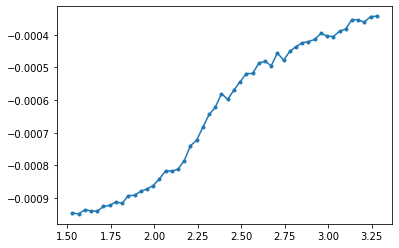

In [212]:
plt.plot(T,Energy,'.-')

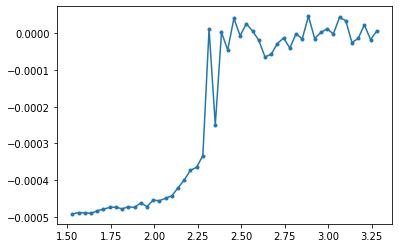

In [213]:
plt.plot(T,Magnetization,'.-')

In [209]:
np.exp(-delta_E*Beta)
print(state)

[[-1 -1 -1 ...  1 -1 -1]
 [-1  1 -1 ...  1  1 -1]
 [ 1  1  1 ...  1  1 -1]
 ...
 [ 1  1  1 ...  1  1  1]
 [-1 -1  1 ...  1 -1  1]
 [-1 -1 -1 ...  1 -1 -1]]
